In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

### Task 1: (5+5+5+5+5=25 pts)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 

a. Report the separating hyperplane (line).
 
b. Calculate the upper and lower hyperplanes (lines) of the margin.

c. Compute the width of the margin.
 
d. List the support vectors.

e. What would happen to the margin if you instead made the constant C very small?


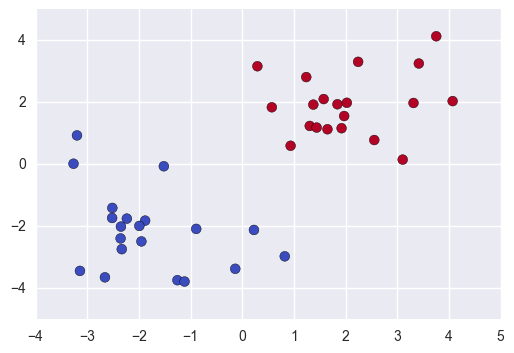

In [2]:
#Data
data1=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

In [4]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear',C=100000)  # when the data is seperable, we can set C as big as we can.
clf.fit(X, Y)

w = clf.coef_[0] #get the coefficents

a = -w[0] / w[1] #slope. We devide w[1] here for a better vision only (w[1] is the coefficient for y). The minus sign appears since we move the x to the right side.
print("The hyperplane is: y={:.3}*x{:.3}".format(a,- (clf.intercept_[0]) / w[1]))# minus sign,and devide w[1]
#it is ok if you have a line like this one:
print("Alternative answer:{:.3}x+{:.3}y+{:.3}=0".format(w[0],w[1],clf.intercept_[0]))

The hyperplane is: y=-1.18*x-0.0767
Alternative answer:0.663x+0.564y+0.0432=0


In [11]:
# Margin: (We need support vectors to get the margin)
#down: Use the same slop, but one support vector on it.
b = clf.support_vectors_[0]
print ("the downside margin is: y={:.3}*x{:.3}".format(a,(b[1] - a* b[0])))

#upside: (Same)
b = clf.support_vectors_[-1]
print ("the upside margin is: y={:.3}*x+{:.3}".format(a,(b[1] - a* b[0])))

#Distance:
print 1/(np.sqrt(w[0]**2+w[1]**2))

#or：
print 2/(np.sqrt(w[0]**2+w[1]**2))

the downside margin is: y=-1.18*x-1.85
the upside margin is: y=-1.18*x+1.7
1.14889967521
2.29779935043


In [7]:
#Support vectors:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

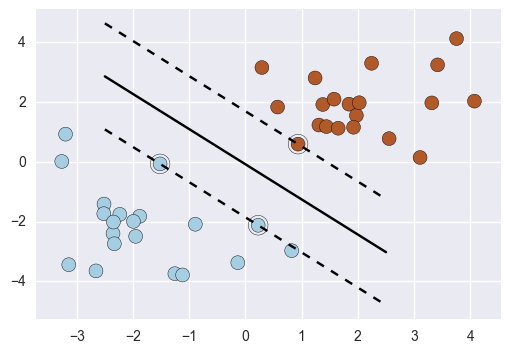

In [8]:
#Change the form of X to numpy array
X=np.array(X)

from sklearn import svm

#Just repeat the steps from part one and plot it.

w = clf.coef_[0]
########################################################################
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=100)

plt.axis('tight')
plt.show()

### Task 2 (5+5+5+5=20 pts)

#### (1) Train polynomial SVM over the training subset of the dataset provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


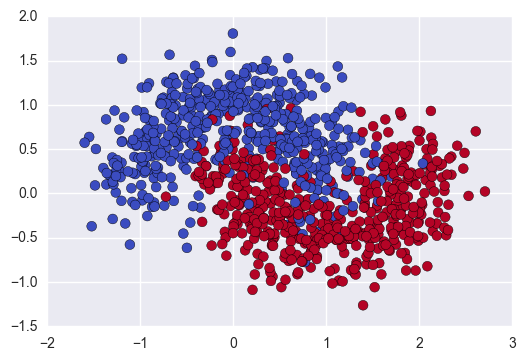

In [13]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

In [17]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)

#Report IS and OS result:
correct_IS=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_OS=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print "we successfully(IS) predict the {:.4} percent of data".format((correct_IS)*100)
print "we successfully(OS) predict the {:.4} percent of data".format((correct_OS)*100)

we successfully(IS) predict the 81.34 percent of data
we successfully(OS) predict the 82.73 percent of data


for degree=1:
When C_opt=1.36555069788, we get max accuracy: 0.837837837838


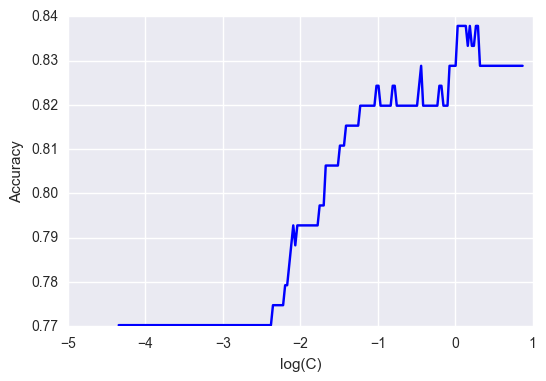

for degree=2:
When C_opt=3.27372882349, we get max accuracy: 0.743243243243


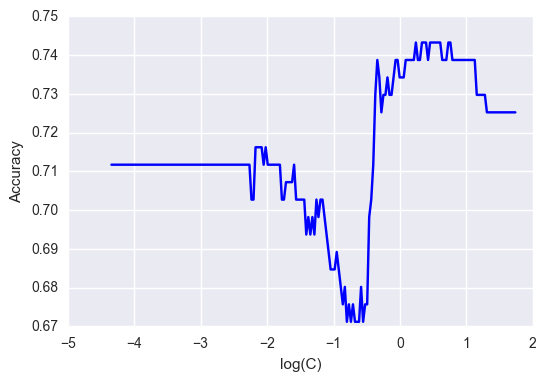

for degree=3:
When C_opt=46.0232051301, we get max accuracy: 0.873873873874


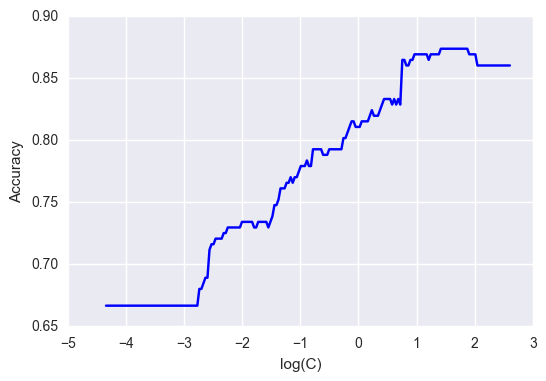

for degree=4:
When C_opt=1.36555069788, we get max accuracy: 0.720720720721


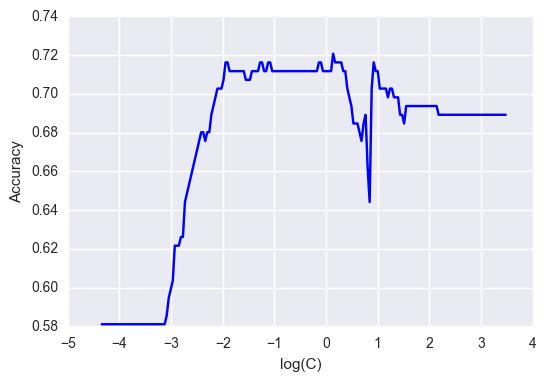

In [18]:
for degree in range(1,5):
    print("for degree={}:".format(degree))
    #When degree increases, we could have a bigger C.
    
    C = np.linspace(-10,2*degree,200)
    C=[math.exp(i) for i in C]
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=degree) 
        clf.fit(X_train_1, Y_train_1)
        right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(right)
    temp=pd.DataFrame([C,OS_validation]).T
    ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 #Here I used middle C instead of the biggest we used for class
    C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

    print("When C_opt={}, we get max accuracy: {}".format(C_opt,temp.iloc[:,1].max()))
    
    C=[math.log(y,10) for y in C]# for a better graph
    pylab.plot(C,OS_validation,'b',)
    pylab.legend(loc='upper right')
    pylab.ylabel('Accuracy')
    pylab.xlabel('log(C)')
    pylab.show()

In [19]:
#Reset the arguments in model,
clf = svm.SVC(kernel='poly',C=82,degree=3)
clf.fit(X_train, Y_train)

#Report IS and OS result:
correct_OS=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {:.4} percent of data".format((correct_OS)*100)

we successfully(OS) predict the 87.58 percent of data


### Task 3 (5+5=10pts)

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports(1) or SUV(2)), the color of the car (red(1) or yellow(2)), and the origin of the car (domestic(1) or imported(2)). And the labels for the data are: stolen(1) and not(0). 

#### Questions:

a) Calculate the following sample probabilities:
P(Red|Stolen), P(SUV|Stolen), P(Domestic|Stolen), P(Red|Not Stolen) , P(SUV|Not Stolen), and P(Domestic|Not Stolen)

b) Suggest a classification for a red, domestic SUV - whether it will be stolen or not - using Naive Bayes classifier. 

Please perform all the necessary computations "by hands" rather than using python code.

In [2]:
import numpy as np
import pandas as pd
y=[1,0,1,0,1,0,1,0,0,1]
X=[[1,1,1,2,2,2,2,2,1,1],[1,1,1,1,1,2,2,2,2,1],[1,1,1,1,2,2,2,1,2,2]]
data=[y]+X
data=pd.DataFrame(data).T
data.columns=['Stolen?','Color','Type','Origin']

In [3]:
data

,Stolen?,Color,Type,Origin
0,1,1,1,1
1,0,1,1,1
2,1,1,1,1
3,0,2,1,1
4,1,2,1,2
5,0,2,2,2
6,1,2,2,2
7,0,2,2,1
8,0,1,2,2
9,1,1,1,2


(a)
P(Red|Yes)=3/5=0.6 

P(Red|No)= 2/5=0.4

P(SUV|Yes)=1/5=0.2 

P(SUV|No) =3/5=0.6

P(Domestic|Yes)=2/5=0.4

P(Domestic|No) =3/5=0.6

(b)

P(Yes|Red,SUV,Domestic)~P(Yes) * P(Red | Yes) * P(SUV | Yes) * P(Domestic|Yes)

=0.5 x 0.6 x 0.2 x 0.4

P(No) * P(Red | No) * P(SUV | No) * P (Domestic | No)

=0.5 x 0.4 x 0.6 x 0.6 

Answer: No

### Task 4 (10+10=20pts)
Consider a following Guassian Naive Bayes problem.
We use eight factors to predict if people have diabetes or not. The variabls are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)
#### ---------------------------------------------------------------------------------------------------------------------

#### Questions:

a)Train the classifier: use the training data to estimate prior probabilities $P(y=b)$ as well as the parameters (mean and standard deviation) of the sample distributions $P(x_i|y=b)$.

b)Perform the classification for the test sample and compare your result to y_test and report the OS classification accuracy.

In [20]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/dia_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/dia_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

In [22]:
def trainNaiveBayes(trainData):
  #training Gausian Naive Bayes Classifier
  tY=trainData.loc[:,trainData.columns[0]]
  ind1=tY==0 #Need to change to 0, since my classes are 0 and 1
  ind2=tY==1
  dp=pd.DataFrame(columns=trainData.columns, index=['mu1','sigma1','mu2','sigma2'])
  dp[trainData.columns[0]]['mu1']=1.0*sum(ind1)/len(trainData.index)
  dp[trainData.columns[0]]['mu2']=1.0*sum(ind2)/len(trainData.index)
  for i in trainData.columns[1:]:
    dp.loc['mu1',i]=(trainData[i][ind1]).mean()
    dp.loc['sigma1',i]=(trainData[i][ind1]).std()
    dp.loc['mu2',i]=(trainData[i][ind2]).mean()
    dp.loc['sigma2',i]=(trainData[i][ind2]).std()
  return dp

In [24]:
#Modifided for the zero sigmas !!(This should lead big difference if sample is small!)
def classifyNaiveBayes(classData,dp):
  #classifying using trained Gausian Naive Bayes Classifier
  Y=classData.loc[:,classData.columns[0]]*0
  for j in classData.index:
    P1=dp[classData.columns[0]]['mu1'];
    P2=dp[classData.columns[0]]['mu1'];
    for i in classData.columns[1:]:
        if dp[i]['sigma1']==0:
            #when our sample is very small, how to set this sigma?? if all zeros??
            P1=P1*stats.norm.pdf(classData[i][j], loc=dp[i]['mu1'],scale=0.5) # set 0 to 0.5(maybe need to consider later)
        else:
            P1=P1*stats.norm.pdf(classData[i][j], loc=dp[i]['mu1'],scale=dp[i]['sigma1'])
        
        if dp[i]['sigma2']==0:
            P2=P2*stats.norm.pdf(classData[i][j], loc=dp[i]['mu2'],scale=0.5)
        else:
            P2=P2*stats.norm.pdf(classData[i][j], loc=dp[i]['mu2'],scale=dp[i]['sigma2']) 
    Y[j]=int(P2>P1)
 

  return Y

In [25]:
#(a)
traindata=pd.concat([y_train,X_train],axis=1)
dp=trainNaiveBayes(traindata)
dp

#P(y=0)=0.699; P(y=1)=0.300; mu and sigma are showed in this table.

,y,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
mu1,0.699153,2.69091,111.467,69.2061,27.2,127.006,31.7091,0.468685,28.3939
sigma1,NaN,2.61006,24.6919,11.7133,10.4369,91.4861,6.33761,0.29175,8.53736
mu2,0.300847,4.07042,144.141,74.5634,33.4789,209.211,35.2239,0.639042,35.7887
sigma2,NaN,3.51862,30.6265,13.7993,9.7627,126.921,6.25849,0.439042,10.2635


In [26]:
#(b) The predicted labels are saved in C. Let's have a look.
from scipy import stats

testdata=pd.concat([y_test,X_test],axis=1)
C=classifyNaiveBayes(testdata,dp)
Result_OS=pd.DataFrame([pd.Series.tolist(y_test),pd.Series.tolist(C)]).T

Result_OS.columns=['real','predicted']
Result_OS.head()

,real,predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0


In [30]:
acc=Result_OS.loc[:,'real']==Result_OS.loc[:,'predicted']
print("we guessed(OS) correctely by ratio:{0}".format(acc.sum()*1.0/len(acc)))

we guessed(OS) correctely by ratio:0.76582278481


### Task 5 (10+15=25 pts)
We have an artificial data set split, while the training set contains both - labeled (Label_train) and unlabeled (Unlabel) data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

#### Questions:

a) Use the labeled part data_train to predict the labels of X_Label_test, and report the classification accuracy.

b) Improve the classification by using the unlabeled data data_Unlabel and the EM algorithm to predict labels of X_Label_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use any packages you prefer). 

In [34]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_train.csv")
y_Label_train=data_train.iloc[:,1] 
X_Label_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_test.csv")
y_Label_test=data_test.iloc[:,1]
X_Label_test=data_test.iloc[:,2:]

data_Unlabel=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session4/HW/EM_Unlabel.csv")
X_Unlabel=data_Unlabel.iloc[:,1:]

In [35]:

def trainNaiveBayesDiscrete(trainData):
  #training discrete Naive Bayes Classifier
  tY=trainData.loc[:,trainData.columns[0]]
  m=max([trainData[j][i] for j in trainData.columns[1:] for i in trainData.index]) #maximal number of classes in each feature of a training set
  #create output data structure for the probabilities
  dp=[pd.DataFrame(columns=trainData.columns, index=range(1,m+1)), pd.DataFrame(columns=trainData.columns, index=range(1,m+1))]
  #split the training data between two labels
  ind1=tY==0
  ind2=tY==1
  #estimate P(y=b)  
  dp[0][trainData.columns[0]][1]=1.0*ind1.sum()/len(trainData.index)
  dp[1][trainData.columns[0]][1]=1.0*ind2.sum()/len(trainData.index)
  #estimate conditional probabilities P(x|y=b)
  for j in trainData.columns[1:]:
    for i in range(1,m+1):
        dp[0].loc[i,j]=1.0*(trainData[j][ind1]==i).sum()/ind1.sum();
        dp[1].loc[i,j]=1.0*(trainData[j][ind2]==i).sum()/ind2.sum();
  return dp


def classifyNaiveBayesDiscrete(classData,dp):
  #classifying using trained discrete Naive Bayes Classifier
  Y=classData[classData.columns[0]]*0
  for i in classData.index:
    P1=dp[0][classData.columns[0]][1];
    P2=dp[1][classData.columns[0]][1];
    for j in classData.columns[1:]:
      P1=P1*dp[0][j][classData[j][i]]
      P2=P2*dp[1][j][classData[j][i]]
    Y[i]=int(P2>P1) 
  return Y

In [36]:
# get the probability distribution firstly
trainData=pd.concat([y_Label_train,X_Label_train],axis=1)
dp=trainNaiveBayesDiscrete(trainData)
print dp[0]
print dp[1]

          y    0    1    2
1  0.555556    0  0.2    0
2       NaN  0.2    0  0.2
3       NaN  0.2    0    0
4       NaN  0.2  0.2  0.2
5       NaN    0    0    0
6       NaN  0.4  0.6  0.6
          y     0     1     2
1  0.444444   0.5  0.25  0.25
2       NaN  0.25   0.5   0.5
3       NaN     0  0.25     0
4       NaN     0     0     0
5       NaN  0.25     0     0
6       NaN     0     0  0.25


In [43]:
#Calculate the predicted labels:
testdata=pd.concat([y_Label_test,X_Label_test],axis=1)
C=classifyNaiveBayesDiscrete(testdata,dp)

# Report the accuracy of prediction
acc=format(100.0*sum(C==y_Label_test)/len(y_Label_test))
print ("We correctly classified {0} percents of the trips based on the labeled data only".format(acc))   

We correctly classified 63.8888888889 percents of the trips based on the labeled data only


In [46]:
import math
def EM(X_Label,y_Label,X_Unlabel,dp):
  t = 0  
  haslabels=len(y_Label)>0

  while True:
    t = t + 1

    classData=X_Unlabel
    # Now we want to calculate P(y=1|x) and P(y=2|x) for all observations xj. (these are bunch of scalars)
    # we need this to calculate new dp. Basically speaking, for every new iteration we need a new dp.

    #for y=1 and y=2

    p_x_1=[] #unnormalized P(y=1|x)
    p_x_2=[] #unnormalized P(y=2|x)
    cols=dp[0].columns

    for i in classData.index:
        P1=dp[0][cols[0]][1];
        P2=dp[1][cols[0]][1];
        for j in classData.columns:
            P1=P1*dp[0][j][classData[j][i]]
            P2=P2*dp[1][j][classData[j][i]]
        p_x_1.append(P1)
        p_x_2.append(P2)
    
 
    #Rescale p_x_1 and p_x_2:
    summ=np.asarray(p_x_1)+np.asarray(p_x_2)
    p_x_1_s=np.asarray(p_x_1)/summ
    p_x_2_s=np.asarray(p_x_2)/summ
    inds_1 = np.where(np.isnan(p_x_1_s))
    inds_2 = np.where(np.isnan(p_x_2_s))
    p_x_1_s[inds_1]=0.5
    p_x_2_s[inds_2]=0.5
    #Now let's calculate P(y=1) and P(y=2)
    p_1=p_x_1_s.sum()/len(p_x_1_s)
    p_2=p_x_2_s.sum()/len(p_x_2_s)


    #Now let's calculate the probability distribution of P(xi|y=1) and P(xi|y=2)
    
    m=max([classData[j][i] for j in classData.columns for i in classData.index]) #maximal number of classes in each feature of a training set

    #create output data structure for the probabilities - new iteration
    
    dp1=[pd.DataFrame(columns=cols, index=range(1,m+1)), pd.DataFrame(columns=cols, index=range(1,m+1))]

    #P(y=b)  
    dp1[0][cols[0]][1]=p_1
    dp1[1][cols[0]][1]=p_2


    #estimate conditional probabilities P(x|y=b) -do we add labeled data to fit?

    temp=np.concatenate((np.asmatrix(X_Unlabel),np.asarray(pd.DataFrame(p_x_1_s)),np.asarray(pd.DataFrame(p_x_2_s))),
                        axis=1)
    temp=pd.DataFrame(temp)
    if haslabels:
        temp_l=np.concatenate((np.asmatrix(X_Label),np.asmatrix(1*(y_Label==0)).transpose(),np.asmatrix(1*(y_Label==1)).transpose()),axis=1)
        
        temp_l= pd.DataFrame(temp_l)
        pd.concat([temp,temp_l])
   

    for j in range(1,len(dp[0].T)):
        for i in range(len(dp[0])):

            dp1[0].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-2].sum()/temp.iloc[:,-2].sum()
            dp1[1].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-1].sum()/temp.iloc[:,-1].sum()
 
        ############################################################################################
    # Now we use dp to decide whether to continue our iterations
    if (((dp1[0]-dp[0])**2).sum()).sum()+(((dp1[1]-dp[1])**2).sum()).sum()<0.001: #if dp does not change much
        break
    else: 
        dp=dp1  #save new dp and perform next iteration

        
    ###############################################################################################
        #Calculate the log-likelihood
        
        L=0
        
        for i in classData.index:
            P1=dp[0][cols[0]][1];
            P2=dp[1][cols[0]][1];
            for j in classData.columns:
                P1=P1*dp[0][j][classData[j][i]]
                P2=P2*dp[1][j][classData[j][i]]
            temp=math.log(P1+P2)
            L=L+temp
        if haslabels:    
            for i in X_Label.index:
                yi=list(y_Label)[i]
                P=dp[yi][cols[0]][1];
            for j in X_Label.columns:
                P=P*dp[yi][j][X_Label[j][i]]
            L=L+math.log(P)
        
        print "Iteration {0}: log maximum liklihood = {1}".format(t,L)    
    
  return dp



In [47]:
#perform EM estimation for theta. dp is taken from part a.
dpEM=EM(X_Label_train,y_Label_train,X_Unlabel,dp)
#OS test
C=classifyNaiveBayesDiscrete(testdata,dpEM) #classify test data with a new theta given by EM
acc=100.0*sum(C==y_Label_test)/len(y_Label_test)
print ("After EM we correctly classified {0} percents of the trips".format(acc))

Iteration 1: log maximum liklihood = -548.405668739
Iteration 2: log maximum liklihood = -531.598986356
Iteration 3: log maximum liklihood = -518.555756513
Iteration 4: log maximum liklihood = -515.404322764
Iteration 5: log maximum liklihood = -514.365252158
After EM we correctly classified 94.4444444444 percents of the trips
